<a href="https://colab.research.google.com/github/syahputra21/Tugas-3_Multilabel_Brayen-Syahputra_202255202089/blob/main/Tugas-3_Multilabel_Brayen-Syahputra_202255202089.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Kaggle API (quiet mode)
!pip install -q kaggle

# Import deep learning and data processing libraries
import keras
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, BatchNormalization
from keras.preprocessing import image

# Import data analysis and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import model evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Import progress bar
from tqdm import tqdm

In [2]:
import os

# Set Kaggle credentials as environment variables
os.environ["KAGGLE_USERNAME"] = "brayensyahputra"
os.environ["KAGGLE_KEY"] = "1ec7920a9605c676131397cfbb8b3427"

In [3]:
# Core deep learning components
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import (
    Input,
    Dense,
    Dropout,
    GlobalAveragePooling2D,
    BatchNormalization
)
from keras.preprocessing import image
import keras

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation and utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
from tqdm import tqdm  # Progress bar

In [4]:
# Mengunduh dataset dari Kaggle menggunakan API
!kaggle datasets download \
  -d brayensyahputra/datasetmultilabel-brayen-syahputra-202255202089

Dataset URL: https://www.kaggle.com/datasets/brayensyahputra/datasetmultilabel-brayen-syahputra-202255202089
License(s): unknown


In [5]:
# prompt: unzip file movie-classifier.zip

!unzip datasetmultilabel-brayen-syahputra-202255202089.zip

Archive:  datasetmultilabel-brayen-syahputra-202255202089.zip
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar001.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar002.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar003.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar004.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar005.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar006.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar007.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar008.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar009.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar010.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar011.jpg  
  inflating: DatasetMultilabel_Brayen Syahputra_202255202089/Gambar012.jpg  
  inflating: D

In [6]:
# Membaca file CSV menggunakan pandas
# - Menentukan path file dataset
# - Menggunakan delimiter titik koma (;) karena format CSV mungkin menggunakan ini
dataframe = pd.read_csv(
    '/content/traindataset_Brayen Syahputra_202255202089.csv',
    delimiter=';'
)

# Menampilkan preview data (5 baris pertama)
# Fungsi display() memberikan tampilan yang lebih rapi di notebook
display(dataframe.head())  # Cocok untuk lingkungan Jupyter/Colab

,Id,Object,Piring,Gelas,Sendok,Pisau
0,Gambar001,['Sendok 'Pisau'],0,0,1,1
1,Gambar002,"['Gelas', 'Sendok', 'Pisau']",0,1,1,1
2,Gambar003,"['Piring','Gelas', 'Sendok', 'Pisau']",1,1,1,1
3,Gambar004,['Sendok 'Pisau'],0,0,1,1
4,Gambar005,"['Piring','Gelas', 'Sendok', 'Pisau']",1,1,1,1


In [7]:
import numpy as np
from tqdm import tqdm
from keras.preprocessing import image
import pandas as pd  # Import pandas untuk membaca dataframe

# 1. BACA DATAFRAME TERLEBIH DAHULU
# Ganti dengan path file CSV Anda
df = pd.read_csv('/content/traindataset_Brayen Syahputra_202255202089.csv', delimiter=';')

# 2. KONFIGURASI
UKURAN_GAMBAR = 224  # Ukuran gambar 224x224 piksel
direktori_gambar = '/content/DatasetMultilabel_Brayen Syahputra_202255202089'
gambar_processed = []

# 3. PROSES GAMBAR DENGAN VALIDASI
for i in tqdm(range(len(df)), desc='Memproses Gambar'):
    try:
        # Membaca gambar
        gambar = image.load_img(
            f"{direktori_gambar}/{df['Id'][i]}.jpg",
            target_size=(UKURAN_GAMBAR, UKURAN_GAMBAR, 3)
        )

        # Konversi dan normalisasi
        gambar_array = image.img_to_array(gambar)
        gambar_normalized = gambar_array / 255.0
        gambar_processed.append(gambar_normalized)

    except FileNotFoundError:
        print(f"\nFile tidak ditemukan: {df['Id'][i]}.jpg")
    except Exception as e:
        print(f"\nError pada gambar {df['Id'][i]}: {str(e)}")

# 4. KONVERSI KE NUMPY ARRAY
if len(gambar_processed) > 0:
    X = np.array(gambar_processed)
    print(f"\nBerhasil memproses {len(X)} gambar. Dimensi array: {X.shape}")
else:
    print("Tidak ada gambar yang berhasil diproses!")

Memproses Gambar: 100%|██████████| 300/300 [00:35<00:00,  8.49it/s]


Berhasil memproses 300 gambar. Dimensi array: (300, 224, 224, 3)


In [8]:
# Menampilkan nilai kolom 'Id' pada baris ke-250
print("ID gambar ke-250:", df['Id'][250])

# Menampilkan nilai kolom 'Object' (label) pada baris ke-250
print("Label objek ke-250:", df['Object'][250])

ID gambar ke-250: Gambar251
Label objek ke-250: ['Sendok 'Pisau']


In [9]:
# Daftar kolom yang akan dihapus
kolom_non_target = ['Id', 'Object']

# Membuat array numpy hanya dengan kolom target
y = df.drop(columns=kolom_non_target).values  # .values sama dengan np.array()

# Split data dengan parameter lebih jelas
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,       # 30% untuk testing
    train_size=0.7,      # 70% untuk training (opsional)
    random_state=20,     # untuk hasil yang reproducible
    shuffle=True         # mengacak data sebelum split (default True)
)

In [10]:
# Konfigurasi ukuran input gambar (standar untuk MobileNetV2)
UKURAN_INPUT = 224  # 224x224 piksel dengan 3 channel warna (RGB)

# Memuat model MobileNetV2 pre-trained
# - include_top=False: tidak menyertakan layer klasifikasi terakhir
# - weights='imagenet': menggunakan bobot yang sudah dilatih di ImageNet
model_dasar = MobileNetV2(
    input_shape=(UKURAN_INPUT, UKURAN_INPUT, 3),
    include_top=False,
    weights='imagenet'
)

# Membekukan bobot model dasar untuk transfer learning
# (Bobot tidak akan di-update selama pelatihan awal)
model_dasar.trainable = False

# Membangun model custom di atas model dasar
# Menggunakan Functional API untuk fleksibilitas
# 1. Ambil output dari model dasar
x = model_dasar.output

# 2. Tambahkan layer custom:
x = GlobalAveragePooling2D()(x)  # Reduksi dimensi dengan global average pooling
x = Dense(128, activation='relu')(x)  # Layer fully connected 128 neuron
x = Dropout(0.5)(x)  # Dropout 50% untuk regularisasi
x = Dense(64, activation='relu')(x)  # Layer fully connected 64 neuron
x = Dropout(0.5)(x)  # Dropout 50% lagi

# 3. Layer output untuk klasifikasi multilabel:
# - 4 neuron (sesuaikan dengan jumlah kelas Anda)
# - Aktivasi sigmoid karena multilabel classification
prediksi = Dense(4, activation='sigmoid')(x)

# Membuat model final dengan menggabungkan:
# - Input: model dasar
# - Output: layer custom yang kita buat
model = Model(inputs=model_dasar.input, outputs=prediksi)

# Menampilkan ringkasan arsitektur model
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,468 (9.27 MB)

 Trainable params: 172,484 (673.77 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
from tensorflow.keras.metrics import AUC  # Import metrik AUC (Area Under Curve)

# Mengkonfigurasi proses training model
model.compile(
    optimizer='adam',                # Menggunakan optimizer Adam
    loss='binary_crossentropy',      # Fungsi loss untuk klasifikasi multilabel
    metrics=[AUC(name='auc')]        # Metrik evaluasi: AUC (Area Under ROC Curve)
)

In [12]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - auc: 0.5865 - loss: 0.8043 - val_auc: 0.9877 - val_loss: 0.2214
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - auc: 0.8549 - loss: 0.4260 - val_auc: 0.9953 - val_loss: 0.1437
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - auc: 0.9095 - loss: 0.3329 - val_auc: 0.9959 - val_loss: 0.0996
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - auc: 0.9646 - loss: 0.2274 - val_auc: 0.9970 - val_loss: 0.0732
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - auc: 0.9770 - loss: 0.1763 - val_auc: 0.9969 - val_loss: 0.0600
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - auc: 0.9876 - loss: 0.1270 - val_auc: 0.9965 - val_loss: 0.0529
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - auc: 0.9917 - loss: 0.1150 - val_auc: 0.9967 - val_loss: 0.0475
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - auc: 0.9921 - loss: 0.0867 - val_auc: 0.9972 - val_loss: 0.0429
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - auc: 0.9924 - loss: 0.0991 - 

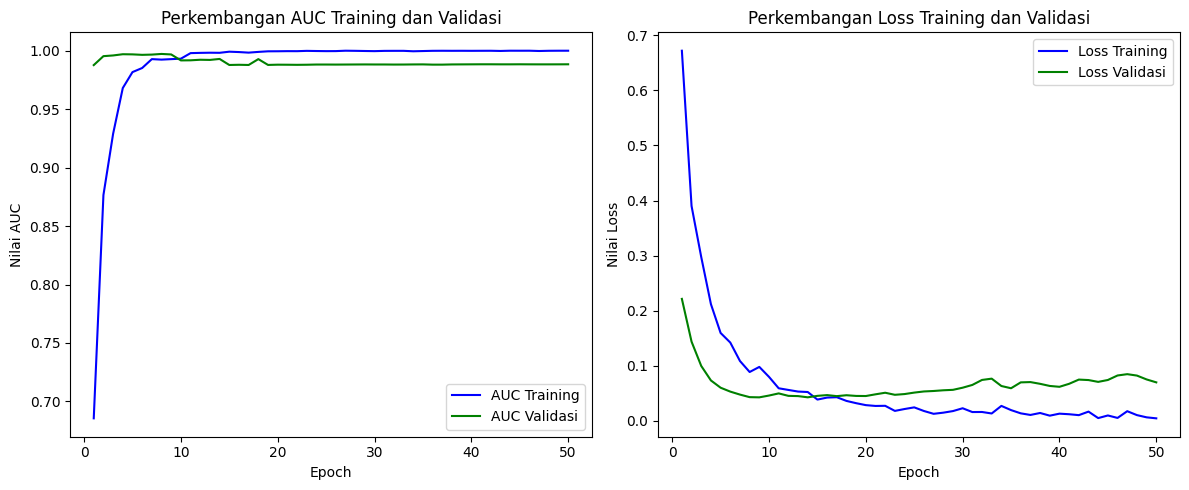

In [13]:
import matplotlib.pyplot as plt

# Ekstrak metrik dari history training
auc_training = history.history['auc']          # Nilai AUC data training
auc_validasi = history.history['val_auc']      # Nilai AUC data validasi
loss_training = history.history['loss']        # Nilai loss training
loss_validasi = history.history['val_loss']    # Nilai loss validasi

# Buat range epoch untuk sumbu x
jumlah_epoch = range(1, len(auc_training) + 1)

# Set ukuran figure
plt.figure(figsize=(12, 5))  # Lebar 12 inci, tinggi 5 inci

# ----------------------
# Plot 1: Grafik AUC
# ----------------------
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
plt.plot(jumlah_epoch, auc_training, 'b-', label='AUC Training')
plt.plot(jumlah_epoch, auc_validasi, 'g-', label='AUC Validasi')
plt.title('Perkembangan AUC Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Nilai AUC')
plt.legend()  # Menampilkan legenda

# ----------------------
# Plot 2: Grafik Loss
# ----------------------
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua
plt.plot(jumlah_epoch, loss_training, 'b-', label='Loss Training')
plt.plot(jumlah_epoch, loss_validasi, 'g-', label='Loss Validasi')
plt.title('Perkembangan Loss Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Nilai Loss')
plt.legend()

# Atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


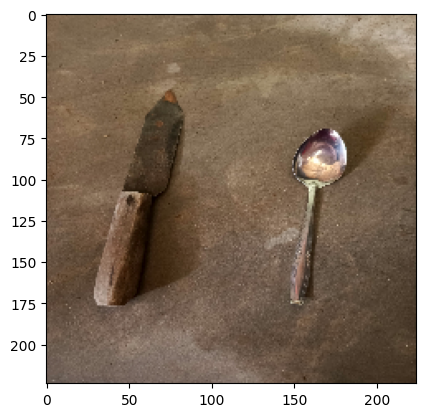

In [14]:
# Pertama, definisikan SIZE (ukuran gambar yang diinginkan)
SIZE = 224  # Anda bisa mengubah nilai ini sesuai kebutuhan

# Gambar yang diprediksi
img = image.load_img('/content/DatasetMultilabel_Brayen Syahputra_202255202089/Gambar105.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [15]:
# MENAMPILKAN HASIL PREDIKSI MODEL

for i in range(4):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

Pisau (1.0)
Sendok (1.0)
Gelas (1.38e-06)
Piring (9.42e-09)


In [16]:
# Evaluasi model dan dapatkan metrik
hasil_evaluasi = model.evaluate(X_test, y_test)
print("\nHASIL EVALUASI MODEL:")
print("-------------------------------------")
print(f"Loss: {hasil_evaluasi[0]:.4f}")  # Nilai loss dengan 4 desimal
print(f"AUC : {hasil_evaluasi[1] * 100:.2f}%")  # AUC dalam persentase
print("-------------------------------------")

# Interpretasi AUC
if hasil_evaluasi[1] >= 0.9:
    print("Klasifikasi sangat baik")
elif hasil_evaluasi[1] >= 0.8:
    print("Klasifikasi baik")
elif hasil_evaluasi[1] >= 0.7:
    print("Klasifikasi cukup")
else:
    print("Perlu perbaikan model")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - auc: 0.9879 - loss: 0.0666

HASIL EVALUASI MODEL:
-------------------------------------
Loss: 0.0697
AUC : 98.84%
-------------------------------------
Klasifikasi sangat baik


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step

LAPORAN KLASIFIKASI:
----------------------------------------
              precision    recall  f1-score   support

      Piring       0.94      1.00      0.97        29
       Gelas       1.00      0.98      0.99        63
      Sendok       1.00      1.00      1.00        90
       Pisau       1.00      1.00      1.00        90

   micro avg       0.99      1.00      0.99       272
   macro avg       0.98      1.00      0.99       272
weighted avg       0.99      1.00      0.99       272
 samples avg       0.99      1.00      0.99       272

----------------------------------------


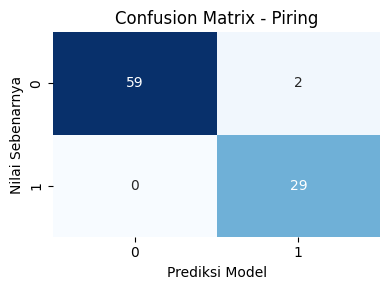

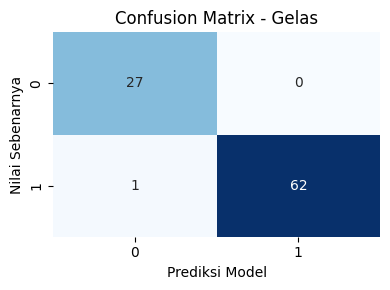

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


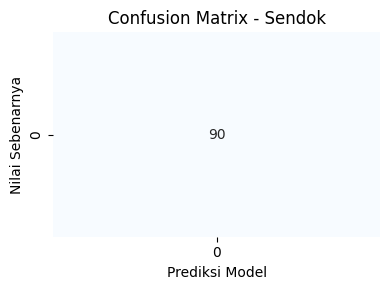

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


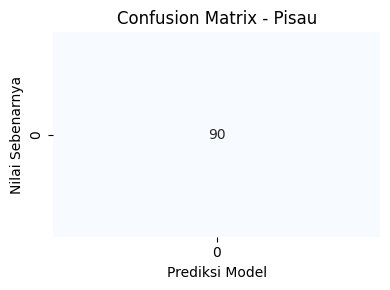

In [17]:
# EVALUASI MODEL DAN VISUALISASI HASIL

# 1. MELAKUKAN PREDIKSI
prediksi = model.predict(X_test)  # Mendapatkan probabilitas prediksi
prediksi_kelas = (prediksi > 0.5).astype(int)  # Konversi ke label kelas (threshold 0.5)

# 2. LAPORAN KLASIFIKASI
print("\nLAPORAN KLASIFIKASI:")
print("----------------------------------------")
print(classification_report(
    y_test,
    prediksi_kelas,
    target_names=classes  # Nama kelas untuk label output
))
print("----------------------------------------")

# 3. VISUALISASI CONFUSION MATRIX PER KELAS
for indeks, nama_kelas in enumerate(classes):
    # Hitung confusion matrix untuk tiap kelas
    matriks_kebingungan = confusion_matrix(
        y_test[:, indeks],  # Label sebenarnya untuk kelas ke-i
        prediksi_kelas[:, indeks]  # Prediksi untuk kelas ke-i
    )

    # Buat visualisasi
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        matriks_kebingungan,
        annot=True,  # Tampilkan angka dalam sel
        fmt='d',     # Format bilangan bulat
        cmap='Blues',# Warna biru gradasi
        cbar=False   # Sembunyikan colorbar
    )
    plt.title(f'Confusion Matrix - {nama_kelas}')
    plt.xlabel('Prediksi Model')
    plt.ylabel('Nilai Sebenarnya')
    plt.tight_layout()
    plt.show()